# <font color='blue'>Data Science Academy</font>

## <font color='blue'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='blue'>Projeto 2</font>

## <font color='blue'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

![DSA](imagens/projeto2.png)

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates

## Carregando os Dados

In [3]:
# Carrega o dataset
df_dsa = pd.read_csv('dados/dataset.csv')

In [4]:
# Shape
df_dsa.shape

(9700, 11)

In [5]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [6]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [7]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [8]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [9]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [10]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [11]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [12]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [13]:
office_supplies = df_dsa[df_dsa['Categoria'] == 'Office Supplies']

In [14]:
vendas_por_cidade = office_supplies.groupby('Cidade')['Valor_Venda'].sum()

In [15]:
cidade_maior_venda = vendas_por_cidade.idxmax()

In [16]:
valor_maior_venda = vendas_por_cidade.max()

In [17]:
print(f"A cidade com maior valor de venda é {cidade_maior_venda} com R${valor_maior_venda:.2f}")

A cidade com maior valor de venda é New York City com R$68362.81


## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [18]:
df_dsa['Valor_Venda'].sum()

2235557.9547

In [19]:
valor_total_vendas = df_dsa['Valor_Venda'].sum()
print(valor_total_vendas)

2235557.9547


In [20]:
df_dsa['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'])

C:\Users\taisa\AppData\Local\Temp\ipykernel_22072\87745636.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_dsa['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'])


In [21]:
valor_por_data_pedido = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum()
print(valor_por_data_pedido)

Data_Pedido
2015-01-02     468.9000
2015-01-03    2203.1510
2015-01-04     119.8880
2015-01-06    5188.5200
2015-01-07     601.0240
                ...    
2018-12-26     814.5940
2018-12-27     177.6360
2018-12-28    1657.3508
2018-12-29    2915.5340
2018-12-30     713.7900
Name: Valor_Venda, Length: 1226, dtype: float64


In [22]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9700 entries, 0 to 9699
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID_Pedido     9700 non-null   object        
 1   Data_Pedido   9700 non-null   datetime64[ns]
 2   ID_Cliente    9700 non-null   object        
 3   Segmento      9700 non-null   object        
 4   Pais          9700 non-null   object        
 5   Cidade        9700 non-null   object        
 6   Estado        9700 non-null   object        
 7   ID_Produto    9700 non-null   object        
 8   Categoria     9700 non-null   object        
 9   SubCategoria  9700 non-null   object        
 10  Valor_Venda   9700 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 833.7+ KB


In [23]:
valor_por_data_pedido = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum()

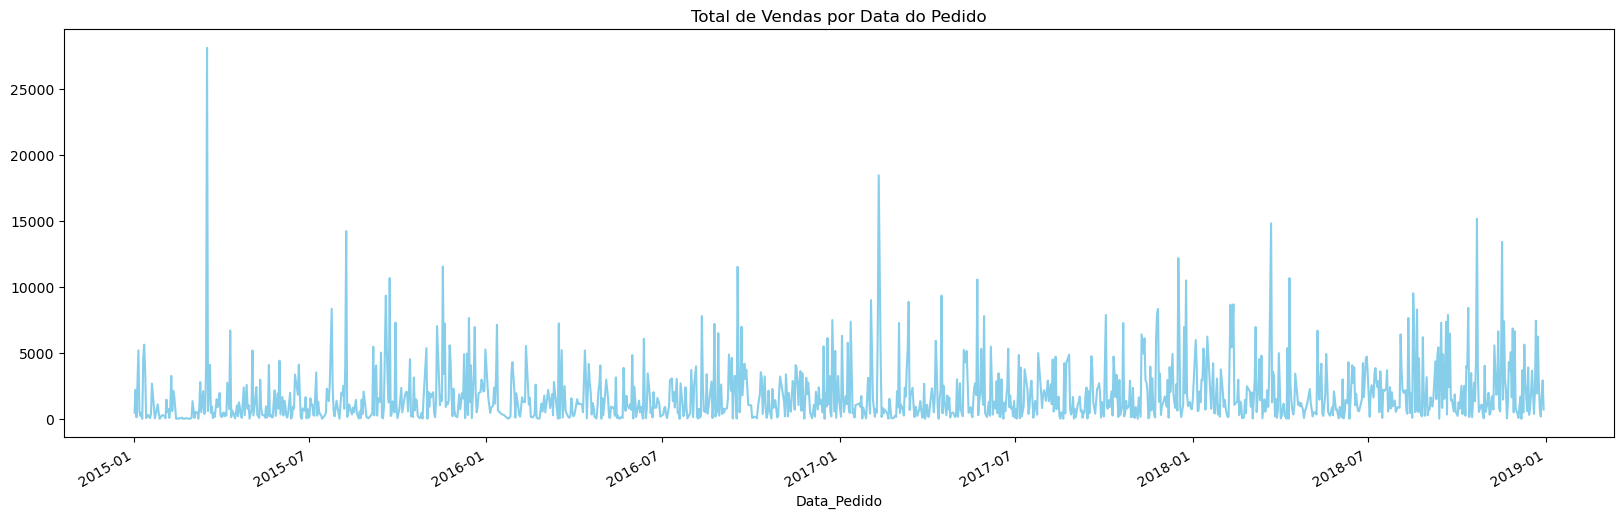

In [24]:
plt.figure(figsize=(20,6))

valor_por_data_pedido.plot(x ='Data_Pedido', y = "Valor_Venda", color='skyblue')
plt.title('Total de Vendas por Data do Pedido') 
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

In [25]:
valor_por_estado = df_dsa.groupby('Estado')['Valor_Venda'].sum()
print(valor_por_estado)

Estado
Alabama                  19510.6400
Arizona                  35272.6570
Arkansas                 11673.8300
California              442927.0975
Colorado                 31841.5980
Connecticut              13366.7370
Delaware                 26452.5890
District of Columbia      2865.0200
Florida                  88043.7000
Georgia                  48083.1600
Idaho                     4292.5160
Illinois                 78109.9270
Indiana                  48718.4000
Iowa                      4443.5600
Kansas                    2914.3100
Kentucky                 36409.5800
Louisiana                 9131.0500
Maine                     1270.5300
Maryland                 23705.5230
Massachusetts            27363.2640
Michigan                 76081.1740
Minnesota                29863.1500
Mississippi              10771.3400
Missouri                 22205.1500
Montana                   5589.3520
Nebraska                  7194.9500
Nevada                   16729.1020
New Hampshire        

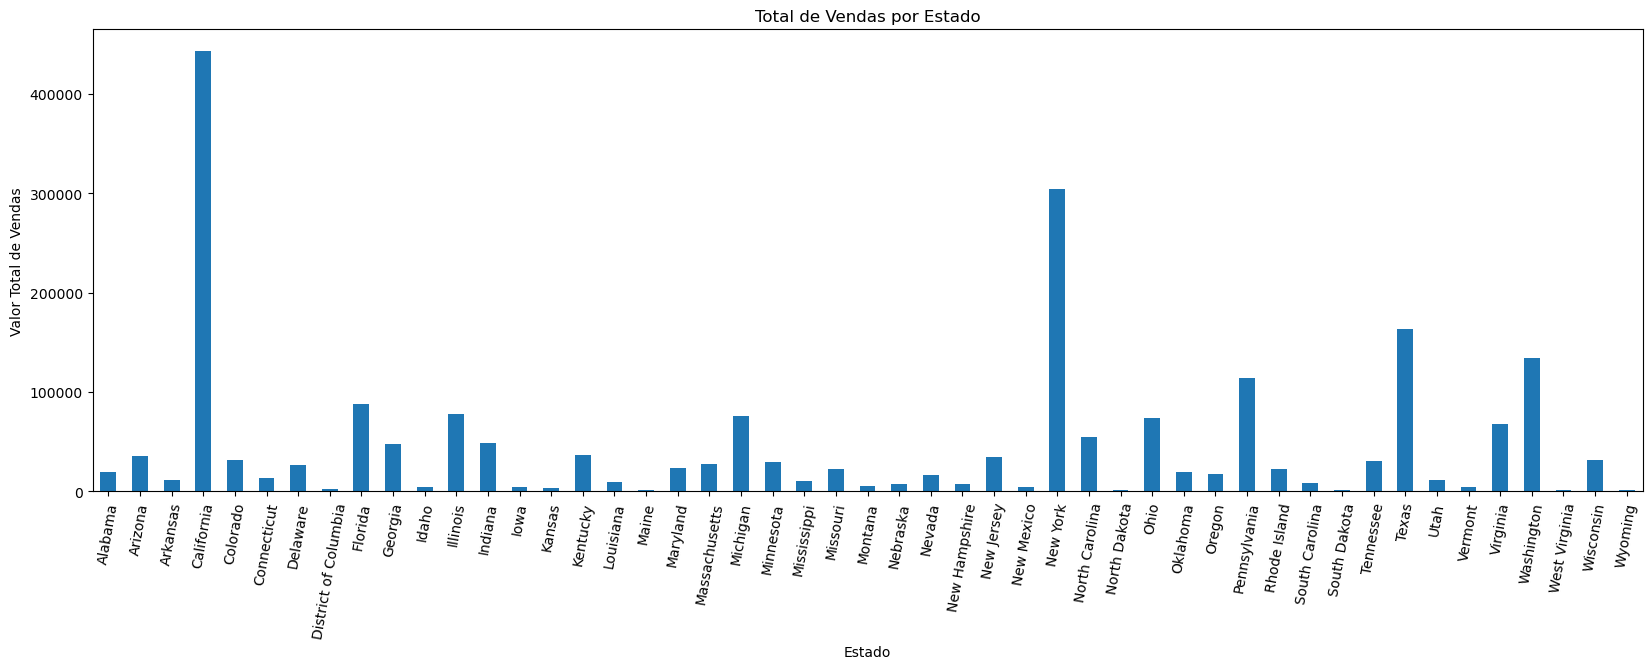

In [82]:
plt.figure(figsize=(20,6))

valor_por_estado.plot(kind='bar')
plt.title('Total de Vendas por Estado') 
plt.xlabel('Estado')
plt.ylabel('Valor Total de Vendas')
plt.xticks(rotation = 80)
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [27]:
valor_por_cidade = df_dsa.groupby('Cidade')['Valor_Venda'].sum()
print(valor_por_cidade)

Cidade
Aberdeen         25.500
Abilene           1.392
Akron          2724.244
Albuquerque    2220.160
Alexandria     5519.570
                 ...   
Woonsocket      195.550
Yonkers        7657.666
York            817.978
Yucaipa          50.800
Yuma            840.865
Name: Valor_Venda, Length: 528, dtype: float64


In [28]:
top_10_cidades = valor_por_cidade.sort_values(ascending=False).head(10)
print(top_10_cidades)

Cidade
New York City    251749.2190
Los Angeles      171654.6330
Seattle          114725.4780
San Francisco    107489.9520
Philadelphia     107197.8030
Houston           61590.1868
San Diego         47458.3790
Chicago           46974.3430
Jacksonville      44713.1830
Detroit           42446.9440
Name: Valor_Venda, dtype: float64


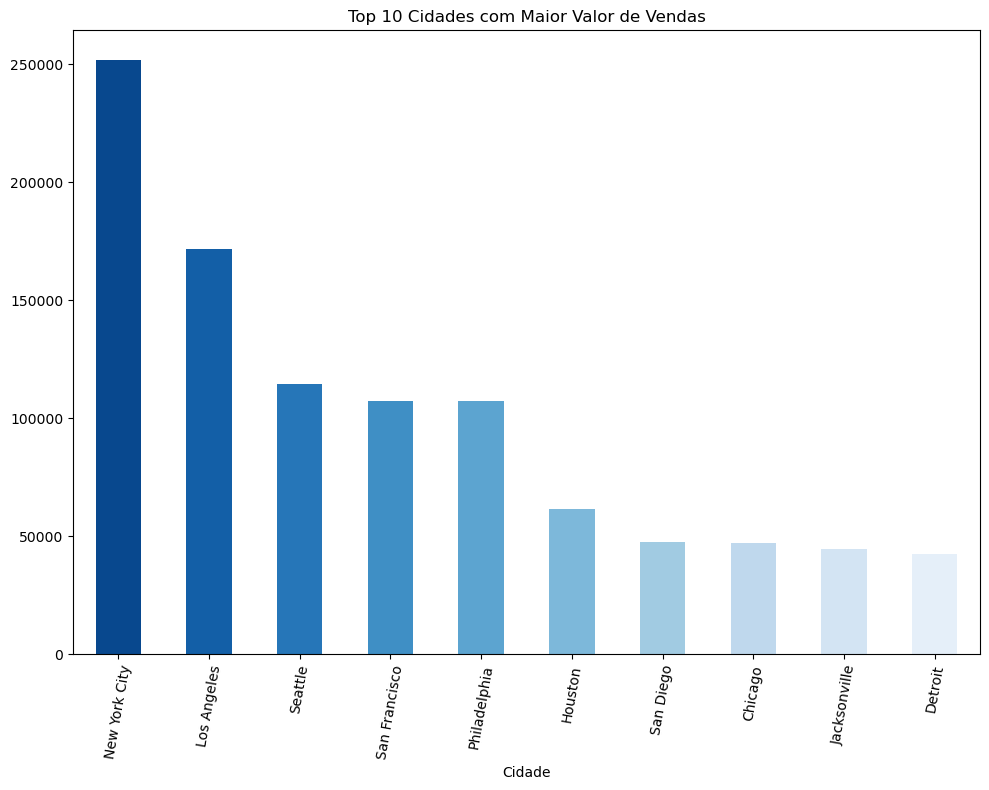

In [90]:
cores_azuis = sns.color_palette('Blues', n_colors=10)[::-1]
plt.figure(figsize=(10,8))

top_10_cidades.plot(kind='bar', color=cores_azuis)

plt.title('Top 10 Cidades com Maior Valor de Vendas')
plt.ylabel('')  
plt.xticks(rotation = 80)
plt.tight_layout()
plt.show()

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [91]:
valor_por_segmento = df_dsa.groupby('Segmento')['Valor_Venda'].sum()

valores_formatados = valor_por_segmento.map('{:.2f}'.format)

print(valores_formatados)

Segmento
Consumer       1133834.33
Corporate       679232.19
Home Office     422491.43
Name: Valor_Venda, dtype: object


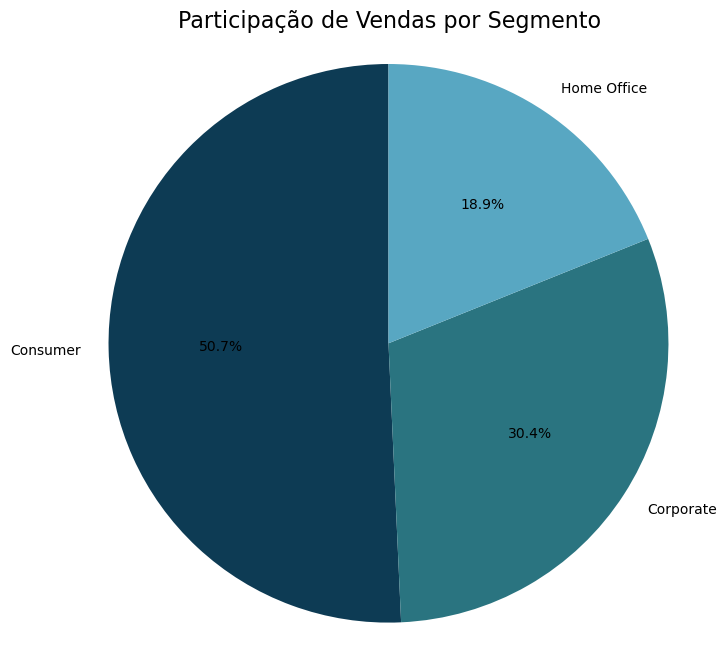

In [92]:
segmentos = ['Consumer', 'Corporate', 'Home Office']
valores = [1133834.00, 679232.20, 422491.40]

# Criar o gráfico de pizza
plt.figure(figsize=(8,8))

plt.pie(valores, labels=segmentos, autopct='%1.1f%%', startangle=90, colors=['#0d3b54', '#2a7480', '#58a7c2'])

plt.title('Participação de Vendas por Segmento', fontsize=16)
plt.axis('equal')  # Deixa o círculo certinho (não ovalado)

plt.show()

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [32]:
df_dsa['Ano'] = df_dsa['Data_Pedido'].dt.year

In [33]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-08-11,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-08-11,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-12-06,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-11-10,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-11-10,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [35]:
valor_por_segmento_e_ano = df_dsa.groupby(['Segmento', 'Ano'])['Valor_Venda'].sum() 

In [37]:
for segmento in valor_por_segmento_e_ano.index.get_level_values(0).unique():
    print(f'\nSegmento: {segmento}')
    print(valor_por_segmento_e_ano.loc[segmento])
    
    total_segmento = valor_por_segmento_e_ano.loc[segmento].sum()
    
    print(f'Total de vendas ({segmento}): {total_segmento:,.2f}')


Segmento: Consumer
Ano
2015    256719.9166
2016    265295.2593
2017    288459.5572
2018    323359.6019
Name: Valor_Venda, dtype: float64
Total de vendas (Consumer): 1,133,834.33

Segmento: Corporate
Ano
2015    125819.5957
2016    114643.1229
2017    203266.7398
2018    235502.7284
Name: Valor_Venda, dtype: float64
Total de vendas (Corporate): 679,232.19

Segmento: Home Office
Ano
2015     88229.0878
2016     74134.1332
2017    103639.6270
2018    156488.5849
Name: Valor_Venda, dtype: float64
Total de vendas (Home Office): 422,491.43


## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [41]:
maior_que_1000 = df_dsa[df_dsa['Valor_Venda'] > 1000].count()
print(maior_que_1000['Valor_Venda'])

457


## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [54]:
media_antes_15 = df_dsa[df_dsa['Valor_Venda'] > 1000]['Valor_Venda'].mean()
print(f'Média antes do desconto: R$ {media_antes_15:.2f}')

Média antes do desconto: R$ 2116.81


In [55]:
df_dsa['Valor_Venda_Com_Desconto'] = df_dsa['Valor_Venda'] * 0.85

media_depois_15 = df_dsa[df_dsa['Valor_Venda'] > 1000]['Valor_Venda_Com_Desconto'].mean()
print(f'Média depois do desconto: R$ {media_depois_15:.2f}')

Média depois do desconto: R$ 1799.29


## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [56]:
df_dsa['Mes'] = df_dsa['Data_Pedido'].dt.month

In [57]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Valor_Venda_Com_Desconto,Mes
0,CA-2017-152156,2017-08-11,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,222.666000,8
1,CA-2017-152156,2017-08-11,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,622.149000,8
2,CA-2017-138688,2017-12-06,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,12.427000,12
3,US-2016-108966,2016-11-10,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,813.940875,11
4,US-2016-108966,2016-11-10,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,19.012800,11


In [58]:
valor_por_segmento_ano_mes = df_dsa.groupby(['Segmento', 'Ano', 'Mes'])['Valor_Venda'].mean() 

for segmento in valor_por_segmento_ano_mes.index.get_level_values(0).unique():
    print(f'\nSegmento: {segmento}')
    print(valor_por_segmento_ano_mes.loc[segmento])
    


Segmento: Consumer
Ano   Mes
2015  1      246.253653
      2      174.913378
      3      147.484241
      4      207.872741
      5      145.306294
      6      201.360102
      7      264.290365
      8      322.935610
      9      334.585053
      10     284.093958
      11     266.040405
      12     282.131228
2016  1      391.736233
      2      214.531293
      3      208.402195
      4      307.830776
      5      251.156042
      6      230.108329
      7      268.971108
      8      235.840750
      9      282.948295
      10     198.527041
      11     170.449035
      12     210.466507
2017  1      232.795227
      2      311.216000
      3      232.684438
      4      129.454260
      5      260.926687
      6      197.055553
      7      250.329392
      8      172.143290
      9      174.062989
      10     164.707495
      11     238.018123
      12     341.179280
2018  1      267.462171
      2      168.309467
      3      253.937845
      4      125.312067
      5   

In [68]:
valor_por_segmento = df_dsa.groupby('Segmento')['Valor_Venda'].mean() 


for segmento, media_venda in valor_por_segmento.items():
    print(f'Média de vendas do segmento {segmento}: R$ {media_venda:.2f}')

Média de vendas do segmento Consumer: R$ 225.01
Média de vendas do segmento Corporate: R$ 231.82
Média de vendas do segmento Home Office: R$ 244.07


In [71]:
valor_por_ano = df_dsa.groupby('Ano')['Valor_Venda'].mean() 


for ano, media_venda_ano in valor_por_ano.items():
    print(f'Média de vendas por ano {ano}: R$ {media_venda_ano:.2f}')

Média de vendas por ano 2015: R$ 245.06
Média de vendas por ano 2016: R$ 222.15
Média de vendas por ano 2017: R$ 237.29
Média de vendas por ano 2018: R$ 221.75


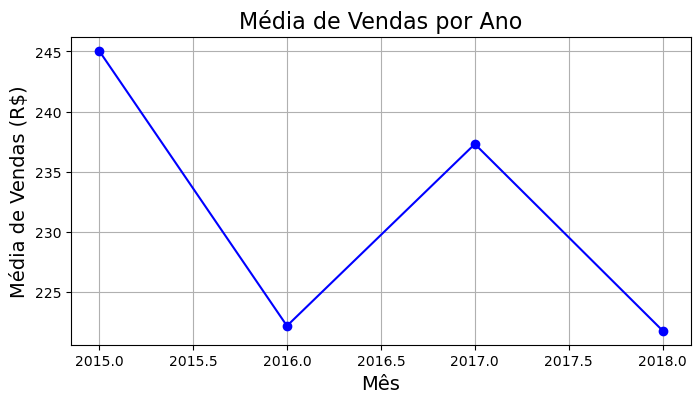

In [74]:
plt.figure(figsize=(8, 4))  
plt.plot(valor_por_ano.index, valor_por_ano.values, marker='o', linestyle='-', color='b')  


plt.title('Média de Vendas por Ano', fontsize=16)
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Média de Vendas (R$)', fontsize=14)


plt.grid(True)
plt.show()

In [72]:
valor_por_mes = df_dsa.groupby('Mes')['Valor_Venda'].mean() 


for mes, media_venda_mes in valor_por_mes.items():
    print(f'Média de vendas por mês {mes}: R$ {media_venda_mes:.2f}')

Média de vendas por mês 1: R$ 271.76
Média de vendas por mês 2: R$ 245.03
Média de vendas por mês 3: R$ 267.06
Média de vendas por mês 4: R$ 207.36
Média de vendas por mês 5: R$ 204.15
Média de vendas por mês 6: R$ 208.06
Média de vendas por mês 7: R$ 218.27
Média de vendas por mês 8: R$ 253.81
Média de vendas por mês 9: R$ 219.33
Média de vendas por mês 10: R$ 228.67
Média de vendas por mês 11: R$ 225.88
Média de vendas por mês 12: R$ 231.97


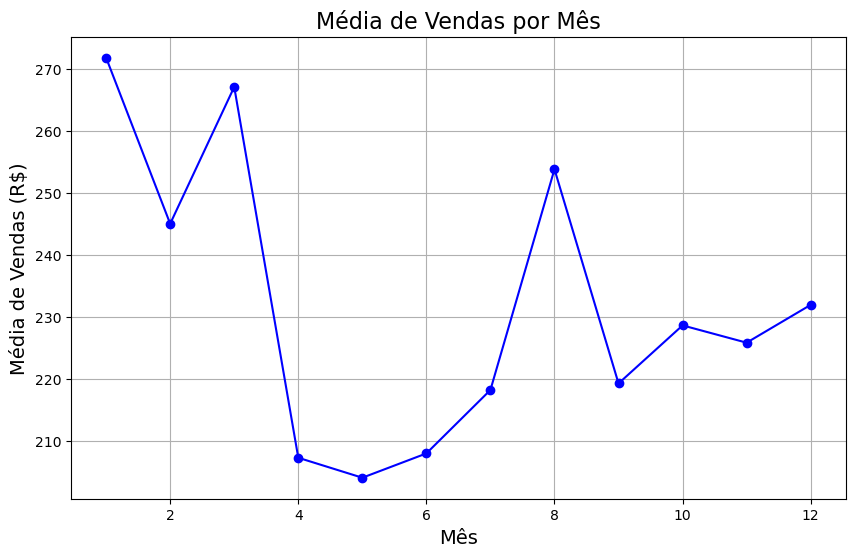

In [73]:
plt.figure(figsize=(10, 6))  
plt.plot(valor_por_mes.index, valor_por_mes.values, marker='o', linestyle='-', color='b')  


plt.title('Média de Vendas por Mês', fontsize=16)
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Média de Vendas (R$)', fontsize=14)


plt.grid(True)
plt.show()

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [77]:
total_vendas_cat_sub = df_dsa.groupby(['Categoria', 'SubCategoria'])['Valor_Venda'].sum()

top_12_subcategorias = total_vendas_cat_sub.groupby('SubCategoria').sum().nlargest(12)

top_12_vendas = total_vendas_cat_sub[total_vendas_cat_sub.index.get_level_values('SubCategoria').isin(top_12_subcategorias.index)]


print(top_12_vendas)
    
    

Categoria        SubCategoria
Furniture        Bookcases       108045.0467
                 Chairs          317919.6250
                 Furnishings      88862.7700
                 Tables          202083.3600
Office Supplies  Appliances      104061.6930
                 Binders         194723.3810
                 Paper            76312.7640
                 Storage         216188.3620
Technology       Accessories     162791.3620
                 Copiers         146248.0940
                 Machines        189238.6310
                 Phones          325271.2940
Name: Valor_Venda, dtype: float64


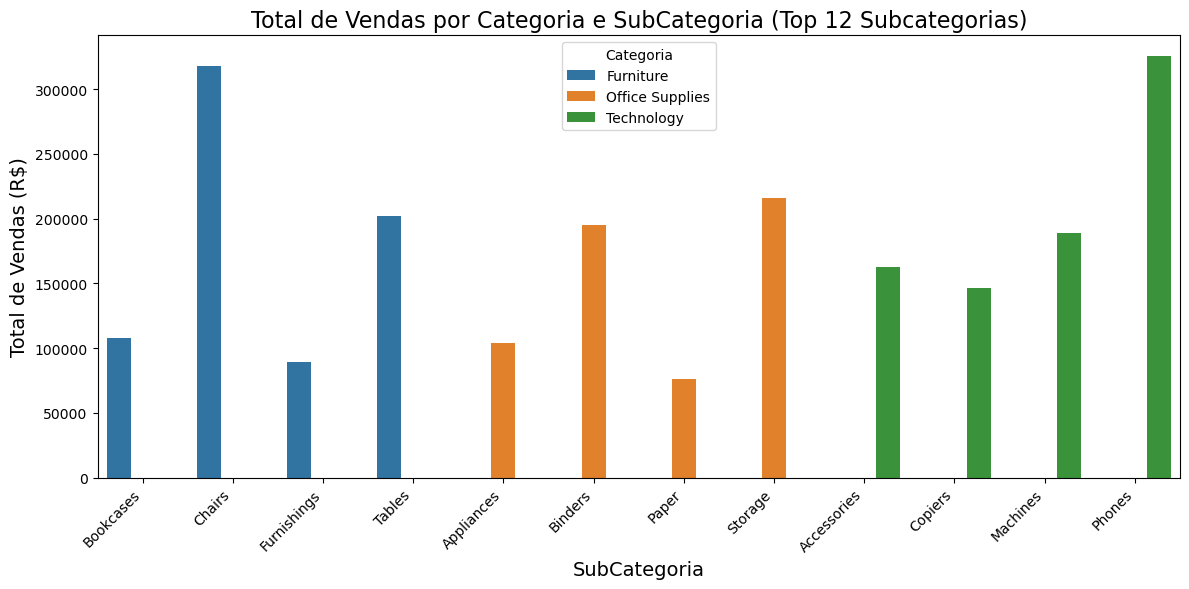

In [78]:
plt.figure(figsize=(12, 6))  
sns.barplot(x=top_12_vendas.index.get_level_values('SubCategoria'), y=top_12_vendas.values, hue=top_12_vendas.index.get_level_values('Categoria'))


plt.title('Total de Vendas por Categoria e SubCategoria (Top 12 Subcategorias)', fontsize=16)
plt.xlabel('SubCategoria', fontsize=14)
plt.ylabel('Total de Vendas (R$)', fontsize=14)
plt.xticks(rotation=45, ha='right') 

plt.tight_layout()  
plt.show()

# Fim